In [189]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [190]:
# Path of the file to read
filepath = "./data/home-data-for-ml-course/train.csv"

# Read the file into a variable fifa_data
# df = pd.read_csv(filepath, index_col="Date", parse_dates=True)
df = pd.read_csv(filepath)

# Set style
sns.set_style("dark")

In [191]:
for col, dtype in zip(df.columns, df.dtypes):
    print(f"{col:20}: {dtype}")

Id                  : int64
MSSubClass          : int64
MSZoning            : object
LotFrontage         : float64
LotArea             : int64
Street              : object
Alley               : object
LotShape            : object
LandContour         : object
Utilities           : object
LotConfig           : object
LandSlope           : object
Neighborhood        : object
Condition1          : object
Condition2          : object
BldgType            : object
HouseStyle          : object
OverallQual         : int64
OverallCond         : int64
YearBuilt           : int64
YearRemodAdd        : int64
RoofStyle           : object
RoofMatl            : object
Exterior1st         : object
Exterior2nd         : object
MasVnrType          : object
MasVnrArea          : float64
ExterQual           : object
ExterCond           : object
Foundation          : object
BsmtQual            : object
BsmtCond            : object
BsmtExposure        : object
BsmtFinType1        : object
BsmtFinSF1         

<Axes: title={'center': 'Area vs YearBuilt'}, xlabel='YearBuilt', ylabel='LotArea'>

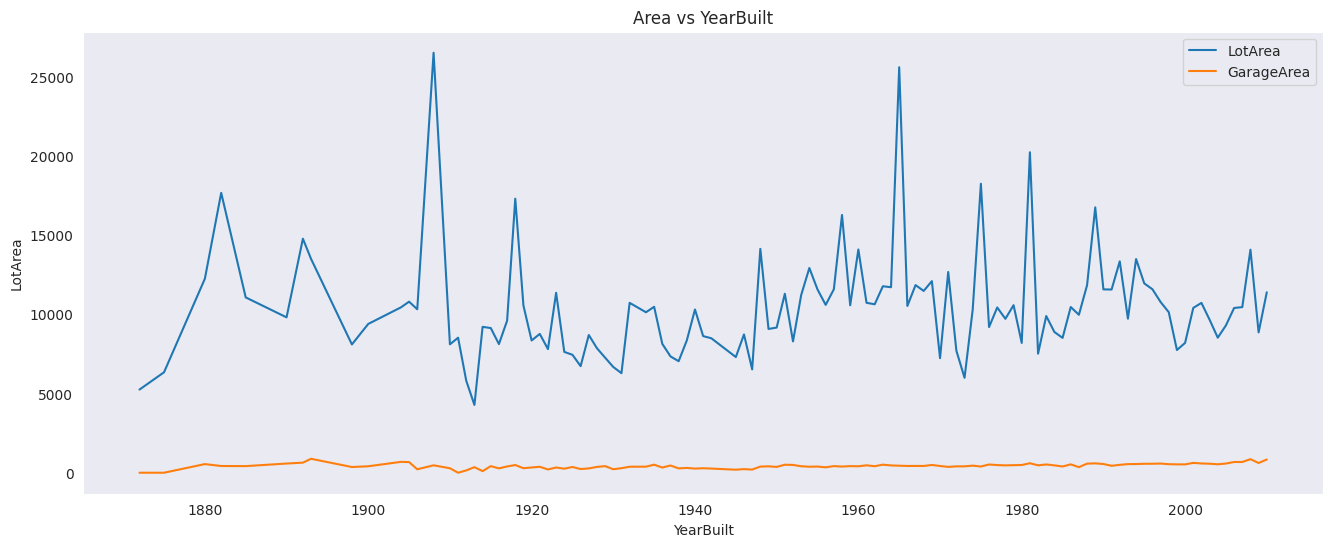

In [192]:
# Line plot - Area vs year built
grouped = df.loc[:, ["YearBuilt", "LotArea", "GarageArea"]]\
    .groupby(["YearBuilt"])\
    .mean()
plt.figure(figsize=(16,6))
plt.title("Area vs YearBuilt")
plt.xlabel("YearBuilt")
sns.lineplot(data=grouped["LotArea"], label="LotArea")
sns.lineplot(data=grouped["GarageArea"], label="GarageArea")

<Axes: title={'center': 'Number of houses built by year'}, xlabel='YearBuilt', ylabel='Number of houses'>

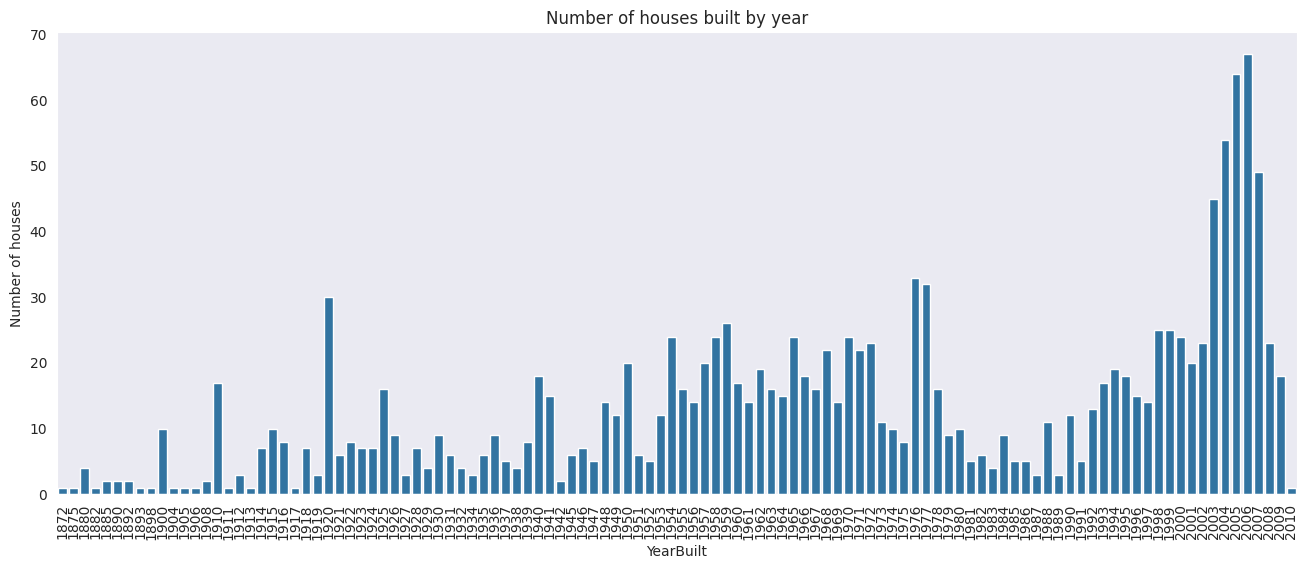

In [193]:
# Bar plot - number of houses by year
grouped = df.loc[:, ["Id", "YearBuilt"]]\
    .groupby(["YearBuilt"])\
    .count()
grouped.head()
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title("Number of houses built by year")
plt.xlabel("YearBuilt")
plt.ylabel("Number of houses")
sns.barplot(x=grouped.index, y=grouped["Id"])

<Axes: title={'center': 'Average Lot Area for each HouseStyle and LotConfig'}, xlabel='None-MSZoning', ylabel='HouseStyle'>

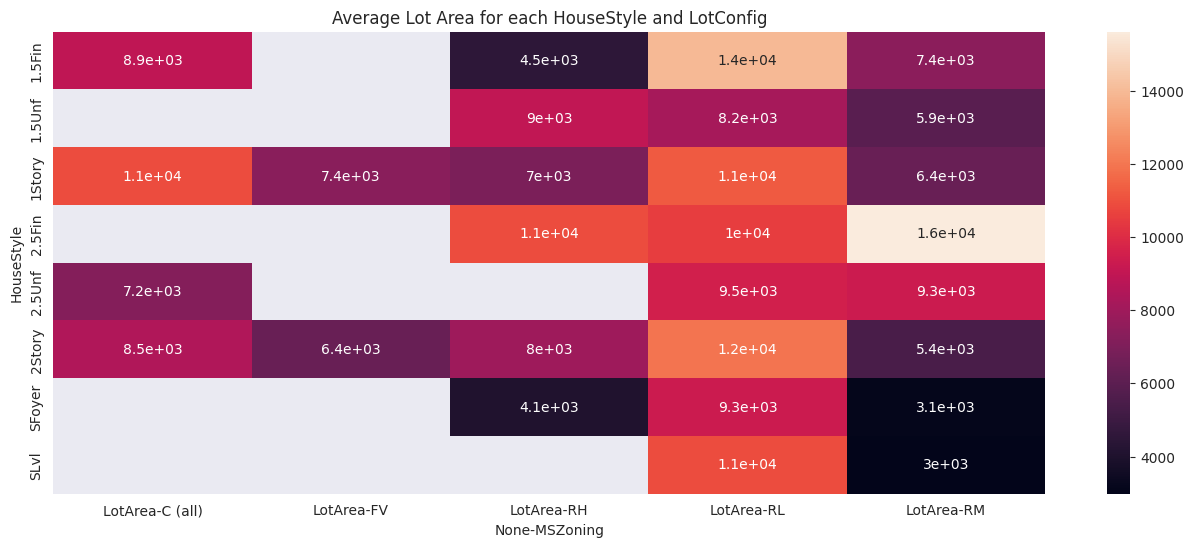

In [194]:
# Heat map
col_value = "LotArea"
col_idx = "HouseStyle"
col_col = "MSZoning"

grouped = df.loc[:, [col_value, col_idx, col_col]]\
    .groupby([col_idx, col_col])\
    .mean()\
    .reset_index()\
    .pivot(index=[col_idx],columns=[col_col], values=[col_value])
plt.figure(figsize=(16,6))
plt.title("Average Lot Area for each HouseStyle and LotConfig")
sns.heatmap(data=grouped, annot=True)

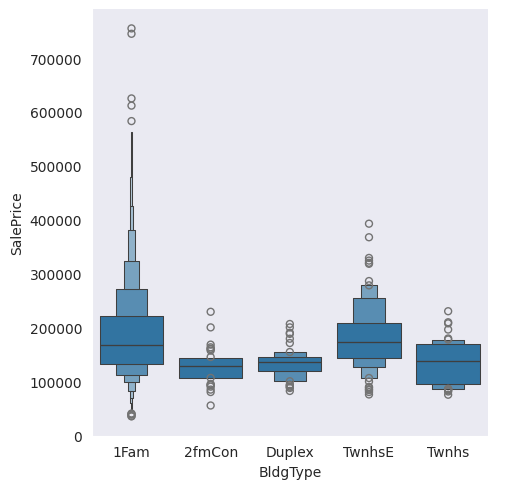

In [208]:
# Boxen plot to show distribution
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

<Axes: xlabel='LotArea', ylabel='SalePrice'>

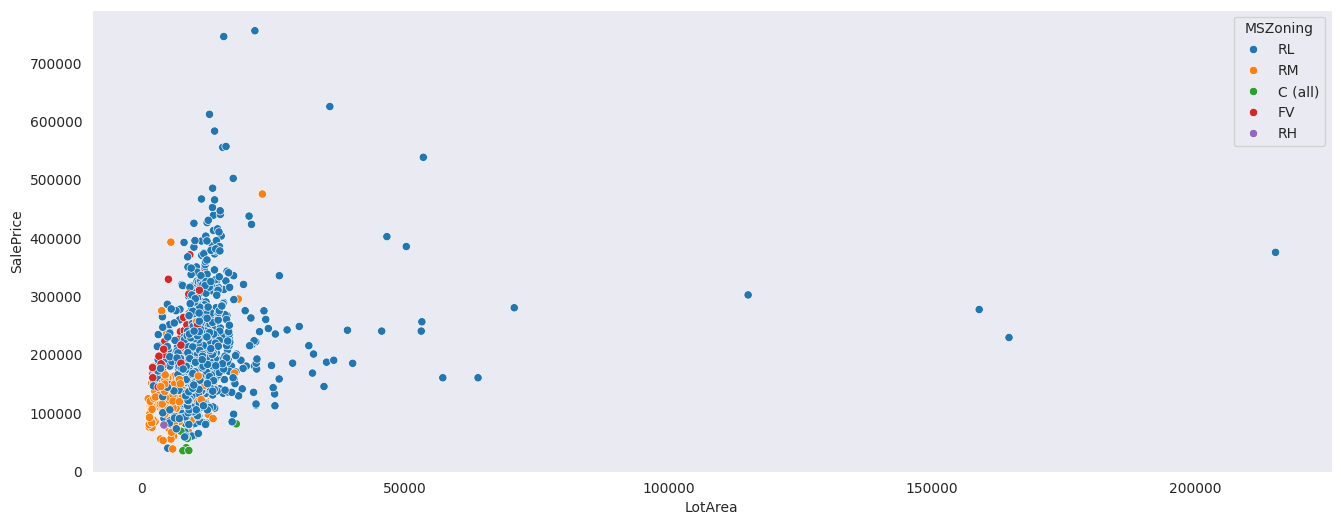

In [195]:
# Scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(x=df["LotArea"],y=df["SalePrice"], hue=df["MSZoning"])

<Figure size 1600x600 with 0 Axes>

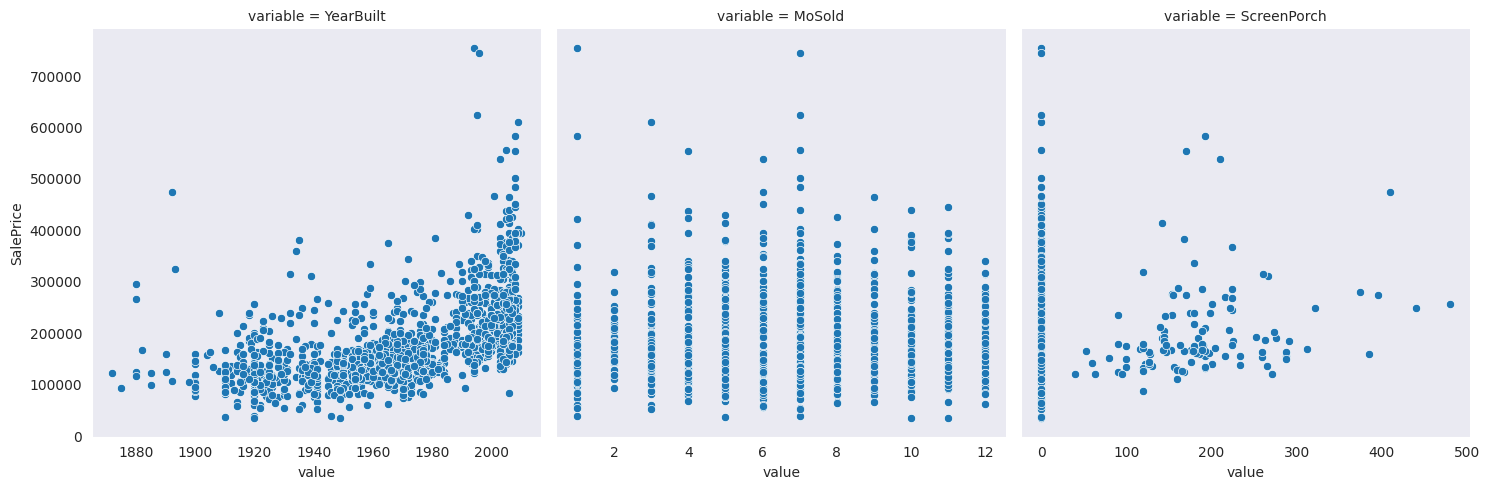

In [207]:
# Multiple scatter plots
plt.figure(figsize=(16,6))
sns.relplot(x="value", y="SalePrice", col="variable",
           data=df.melt(id_vars=["SalePrice"],
                        value_vars=["YearBuilt", "MoSold", "ScreenPorch"]),
           facet_kws=dict(sharex=False))

<Axes: xlabel='LotArea', ylabel='SalePrice'>

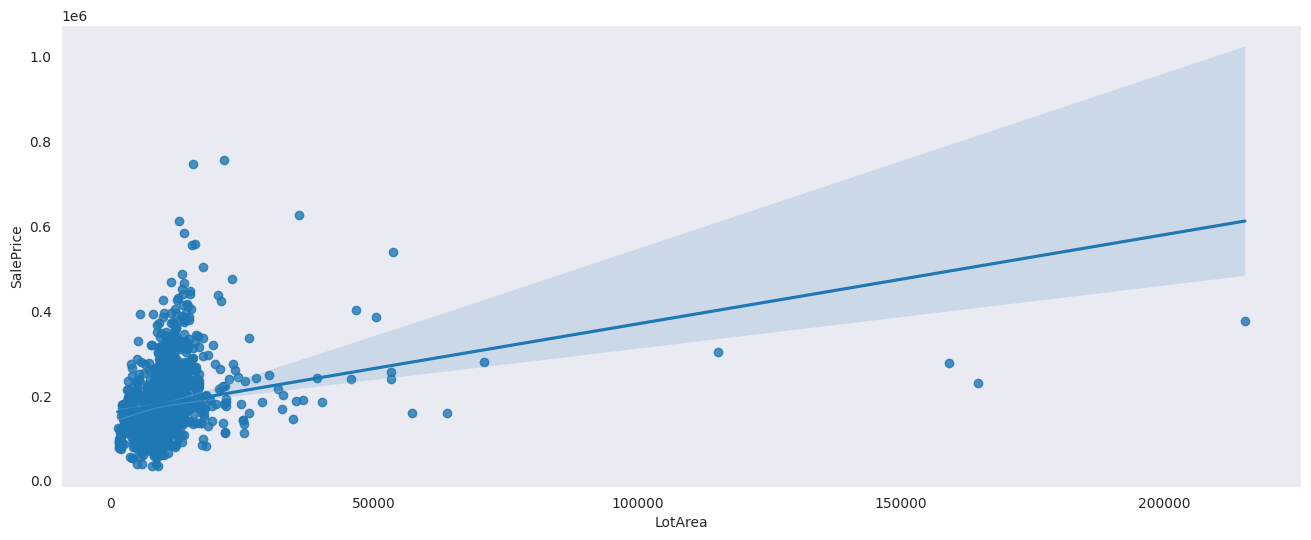

In [196]:
# Scatter with regression
plt.figure(figsize=(16,6))
sns.regplot(x=df["LotArea"],y=df["SalePrice"])

<Figure size 1600x600 with 0 Axes>

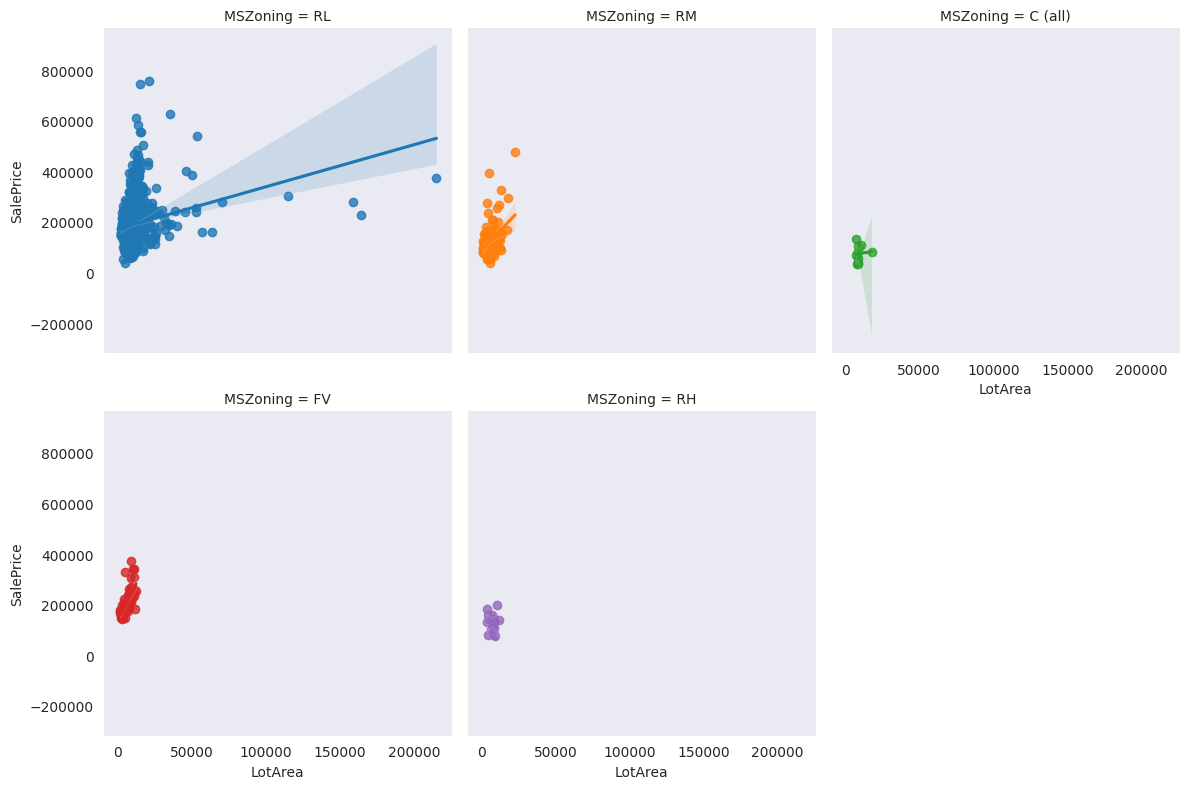

In [212]:
# Scatter with regression on different groups
plt.figure(figsize=(16,6))
sns.lmplot(x="LotArea",y="SalePrice",hue="MSZoning", col="MSZoning",
           data=df, col_wrap=3, height=4)

/home/lemon/.pyenv/versions/3.12.3/envs/learn-ml/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lemon/.pyenv/versions/3.12.3/envs/learn-ml/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='MSZoning', ylabel='SalePrice'>

/home/lemon/.pyenv/versions/3.12.3/envs/learn-ml/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lemon/.pyenv/versions/3.12.3/envs/learn-ml/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


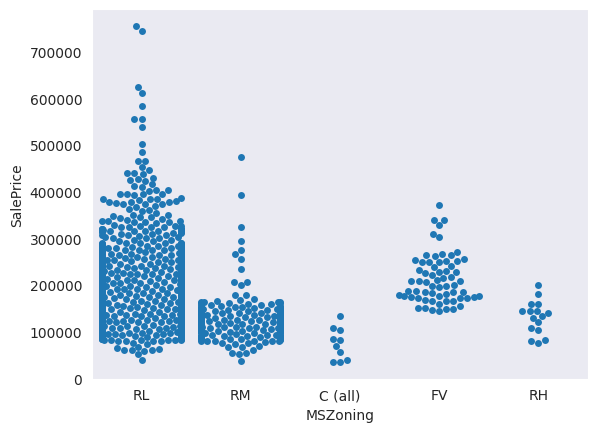

In [198]:
# Swarm plot
sns.swarmplot(x=df["MSZoning"],y=df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Count'>

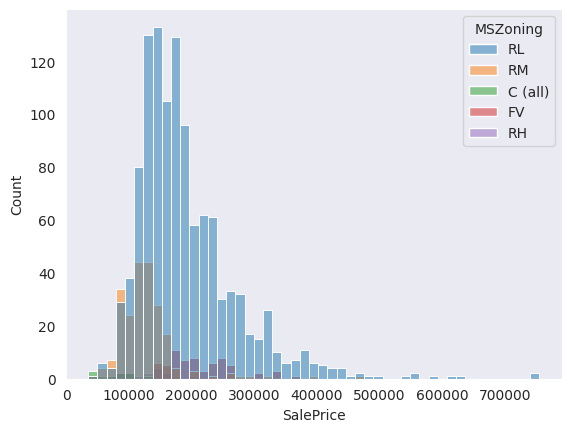

In [199]:
# Historgram
sns.histplot(data=df, x="SalePrice", hue="MSZoning")

<Axes: xlabel='SalePrice', ylabel='Density'>

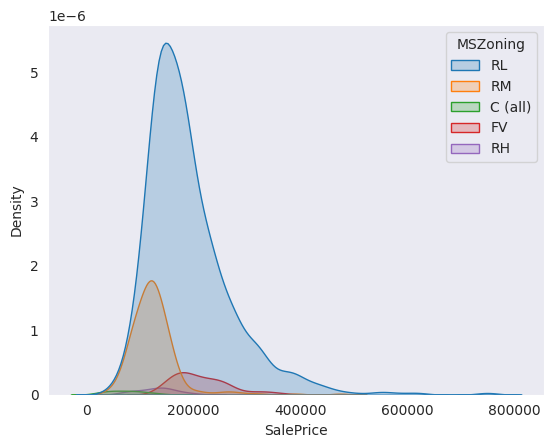

In [200]:
# Kernel density plot
sns.kdeplot(data=df,x="SalePrice",hue="MSZoning",fill=True)

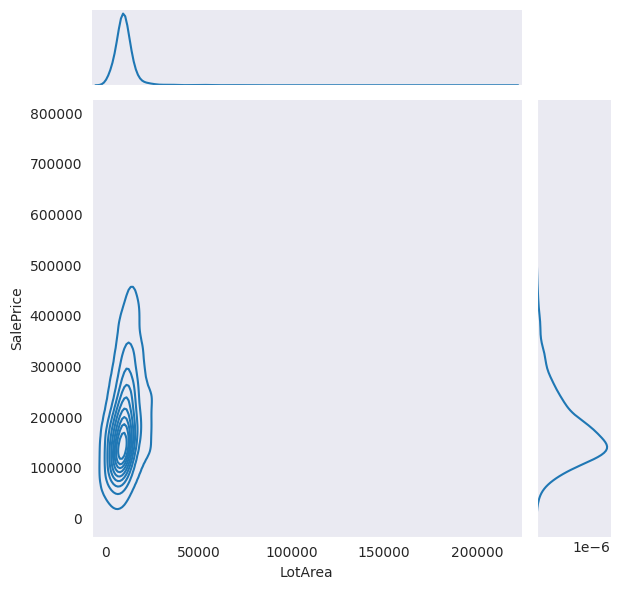

In [201]:
# 2d kde plot
sns.jointplot(x=df["LotArea"],y=df["SalePrice"],kind="kde")